# Projet Mathapp

Pour ce projet, nous aurons besoin des modules Python ci-dessous, il vous faut donc évidemment exécuter cette première cellule.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import sys

In [2]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import scipy as sc

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import geomstats as gs
import geomstats.visualization as visualization
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.special_orthogonal import SpecialOrthogonal

INFO: Using numpy backend


# Importation des données

Nous allons importer toutes les données qui vont nous être utiles, même celles qui ne seront pas utiles avant la fin


In [3]:
dataPath = "cortical_thickness.npy"
labelsPath = "labels.npy"

In [4]:
data  =   np.load(dataPath,allow_pickle=True)

In [5]:
labels  =   np.load(labelsPath,allow_pickle=True)

In [6]:
data[:5]

array([array([[4.85491085],
              [5.74003458],
              [6.68786335],
              ...,
              [1.23504281],
              [1.2750001 ],
              [1.11842108]]), array([[5.64812231],
                                     [5.64812231],
                                     [6.54074097],
                                     ...,
                                     [1.23626375],
                                     [1.43533242],
                                     [1.30319166]]),
       array([[10.88043499],
              [11.8590641 ],
              [10.90960217],
              ...,
              [ 1.        ],
              [ 1.0518868 ],
              [ 1.20212793]]), array([[4.46120691],
                                      [5.47523165],
                                      [6.51008129],
                                      ...,
                                      [1.18652761],
                                      [1.16525435],
                        

In [7]:
labels[:5]

array([1., 0., 0., 0., 1.])

# Visualisation et normalisation des données

(array([0.05028722, 0.09890038, 0.14685706, 0.25856558, 0.38230759,
        0.31389465, 0.312969  , 0.24147056, 0.17539473, 0.16573774,
        0.1068111 , 0.08692599, 0.07537831, 0.0497292 , 0.04457575,
        0.03138027, 0.02400131, 0.02067947, 0.01357624, 0.01007714,
        0.00980798, 0.00626949, 0.00568521, 0.00443788, 0.00384704,
        0.00391269, 0.0031249 , 0.00266535, 0.00248154, 0.00177909,
        0.00190382, 0.00134581, 0.00150993, 0.00143115, 0.00137207,
        0.00141146, 0.00144428, 0.00126703, 0.00096504, 0.00130642]),
 array([3.13460827e-04, 3.75198074e-01, 7.50082687e-01, 1.12496730e+00,
        1.49985191e+00, 1.87473653e+00, 2.24962114e+00, 2.62450575e+00,
        2.99939036e+00, 3.37427498e+00, 3.74915959e+00, 4.12404420e+00,
        4.49892882e+00, 4.87381343e+00, 5.24869804e+00, 5.62358265e+00,
        5.99846727e+00, 6.37335188e+00, 6.74823649e+00, 7.12312111e+00,
        7.49800572e+00, 7.87289033e+00, 8.24777494e+00, 8.62265956e+00,
        8.99754417e+00

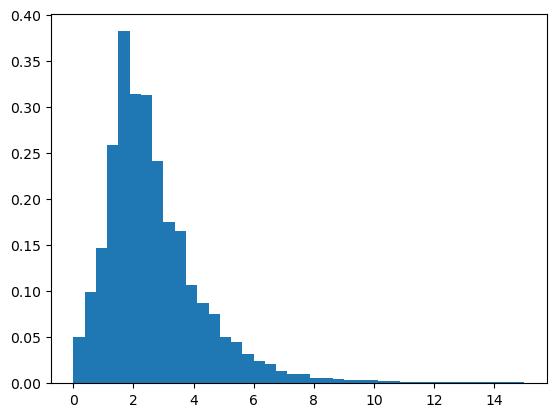

In [8]:
plt.hist(data[0], density = True,bins=40)

In [9]:
def normalised(vect):
    normed=np.zeros(vect.size,dtype=object)
    max = np.zeros(vect.size)
    K = vect.size
    for k in range(K):
        max[k] = np.max(data[k]) 
    
    max = np.max(max) + 10**(-10)
    for k in range(K):
        normed[k] = vect[k] / max
    return(normed)

dataNormed = normalised(data)

(array([0.75430626, 1.4835018 , 2.20284999, 3.8784734 , 5.73459854,
        4.70840722, 4.69452247, 3.62204866, 2.63091387, 2.4860595 ,
        1.60216224, 1.30388631, 1.1306716 , 0.74593602, 0.6686344 ,
        0.47070286, 0.36001876, 0.31019122, 0.20364299, 0.15115667,
        0.14711926, 0.0940421 , 0.08527797, 0.06656802, 0.05770541,
        0.05869015, 0.04687334, 0.0399802 , 0.03722295, 0.02668629,
        0.02855729, 0.02018705, 0.02264888, 0.0214672 , 0.02058094,
        0.02117178, 0.02166415, 0.01900537, 0.01447559, 0.01959621]),
 array([2.08974443e-05, 2.50132717e-02, 5.00056460e-02, 7.49980202e-02,
        9.99903945e-02, 1.24982769e-01, 1.49975143e-01, 1.74967517e-01,
        1.99959892e-01, 2.24952266e-01, 2.49944640e-01, 2.74937014e-01,
        2.99929389e-01, 3.24921763e-01, 3.49914137e-01, 3.74906511e-01,
        3.99898886e-01, 4.24891260e-01, 4.49883634e-01, 4.74876008e-01,
        4.99868383e-01, 5.24860757e-01, 5.49853131e-01, 5.74845505e-01,
        5.99837880e-01

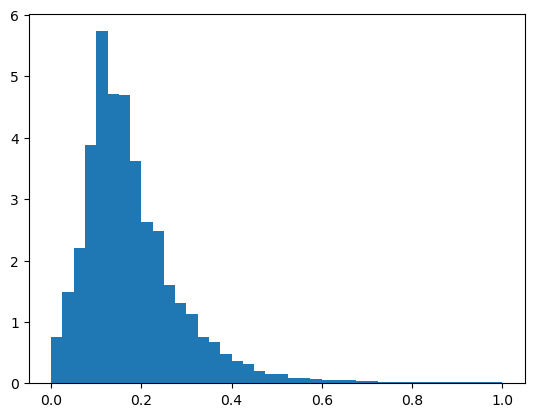

In [10]:
plt.hist(dataNormed[0], density = True,bins=40)

# Test de fit sur une loi Beta

In [11]:
mod = sc.stats.beta.fit(dataNormed[0],floc=0,fscale=1)
mod

(1.9895584883043513, 8.691934325506143, 0, 1)

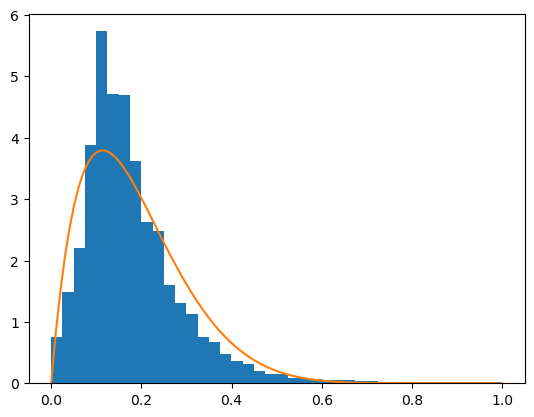

In [12]:
plt.hist(dataNormed[0], density = True,bins=40)
X = np.linspace(0,1,100)
plt.plot(X, sc.stats.beta.pdf(X, mod[0], mod[1], loc = mod[2], scale = mod[3]))

# Exemple de Découpage train / test

En apprentissage statistique, classiquement un prédicteur est ajusté sur une partie seulement des données et l'erreur de ce dernier est ensuite évaluée sur une autre partie des données disponibles. Ceci permet de ne pas utiliser les mêmes données pour ajuster et évaluer la qualité d'un prédicteur.

> En utilisant la fonction [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) de la librairie [`sklearn.model_selection`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection), on sélectionne aléatoirement 60% des observations pour l'échantillon d'apprentissage et on garde le reste pour l'échantillon de test. 

In [13]:
from sklearn import model_selection
import random
from datetime import datetime

XTrain,XTest,YTrain, YTest = model_selection.train_test_split(dataNormed, labels, test_size=0.3, train_size=0.7, random_state=random.seed(datetime.now().timestamp()), shuffle=True, stratify=None)

# Fit de toutes les observations de Xtrain

In [14]:
nTrain = XTrain.size
modTrain = np.zeros((nTrain,2))
for k in range(nTrain):
    mod= sc.stats.beta.fit(dataNormed[k],floc=0,fscale=1)
    modTrain[k,0] = mod[0]
    modTrain[k,1] = mod[1]
    
nTest = XTest.size
modTest = np.zeros((nTest,2))
for k in range(nTest):
    mod= sc.stats.beta.fit(dataNormed[k],floc=0,fscale=1)
    modTest[k,0] = mod[0]
    modTest[k,1] = mod[1]

# Méthode des k plus proches voisins

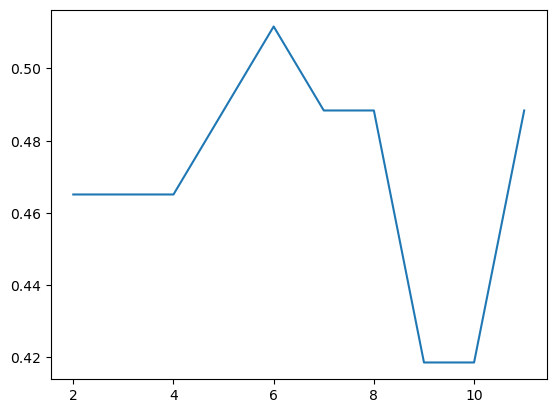

In [15]:
n =10
results = np.zeros(n)
for k in range(2,n+2):
    modKNN = KNeighborsClassifier(n_neighbors=k).fit(modTrain,YTrain)

    results[k-2] = np.mean(modKNN.predict(modTest)==YTest)
plt.plot(range(2,n+2),results)

In [16]:
def meanBestResult(nbtest,n=8):
    bestresults = np.zeros(nbtest)
    for i in range(nbtest):
        XTrain,XTest,YTrain, YTest = model_selection.train_test_split(dataNormed, labels, test_size=0.4, train_size=0.6, random_state=random.seed(datetime.now().timestamp()), shuffle=True, stratify=None)
        nTrain = XTrain.size
        modTrain = np.zeros((nTrain,2))
        for k in range(nTrain):
            mod= sc.stats.beta.fit(dataNormed[k],floc=0,fscale=1)
            modTrain[k,0] = mod[0]
            modTrain[k,1] = mod[1]
        
        nTest = XTest.size
        modTest = np.zeros((nTest,2))
        for k in range(nTest):
            mod= sc.stats.beta.fit(dataNormed[k],floc=0,fscale=1)
            modTest[k,0] = mod[0]
            modTest[k,1] = mod[1]
            
        results = np.zeros(n)
        for k in range(2,n+2):
            modKNN = KNeighborsClassifier(n_neighbors=k).fit(modTrain,YTrain)
            results[k-2] = np.mean(modKNN.predict(modTest)==YTest)
        bestresults[i] = np.max(results)
    return np.mean(bestresults)

meanBestResult(10)

0.5948275862068966

# Kmeans : approche Riemanniane

In [17]:
from geomstats.learning.kmeans import RiemannianKMeans
from geomstats.geometry.hypersphere import Hypersphere

manifold = Hypersphere(dim=2)

kmeans = RiemannianKMeans(manifold, 2, tol=1e-3)
kmeans.fit(modTrain)

np.mean(kmeans.predict(modTest)==YTest)

0.5116279069767442

# Random Forest

In [18]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [19]:
RFC = RandomForestClassifier(
    max_depth=5, 
    n_estimators=10, 
    max_features="log2", 
    random_state=0
    )

RFC.fit(modTrain, YTrain)
np.mean(RFC.predict(modTest)==YTest)

0.4883720930232558

In [20]:
ABC = AdaBoostClassifier(
    algorithm="SAMME.R",
    n_estimators=60,
    learning_rate=1,
    random_state=0
)

ABC.fit(modTrain, YTrain)
np.mean(ABC.predict(modTest)==YTest)

0.46511627906976744

# Classification avec l'histogramme

In [21]:
nTrain = XTrain.size
modTrain = np.zeros((nTrain,10))

for k in range(nTrain):
    modTrain[k] = np.histogram(XTrain[k], bins=10)[0]

nTest = XTest.size
modTest = np.zeros((nTest,10))
for k in range(nTest):
    modTest[k] = np.histogram(XTest[k], bins=10)[0]

In [22]:
def meanBestResult(nbtest,n=8):
    bestresults = np.zeros(nbtest)
    for i in range(nbtest):
        XTrain,XTest,YTrain, YTest = model_selection.train_test_split(dataNormed, labels, test_size=0.4, train_size=0.6, random_state=random.seed(datetime.now().timestamp()), shuffle=True, stratify=None)
        nbins = 10
        nTrain = XTrain.size
        modTrain = np.zeros((nTrain,nbins))

        for k in range(nTrain):
            modTrain[k] = np.histogram(XTrain[k], bins=nbins)[0]

        nTest = XTest.size
        modTest = np.zeros((nTest,nbins))
        for k in range(nTest):
            modTest[k] = np.histogram(XTest[k], bins=nbins)[0]

        results = np.zeros(n)
        for k in range(2,n+2):
            modKNN = KNeighborsClassifier(n_neighbors=k).fit(modTrain,YTrain)
            results[k-2] = np.mean(modKNN.predict(modTest)==YTest)
        bestresults[i] = np.max(results)
    return np.mean(bestresults)

meanBestResult(10)

0.8517241379310345